In [180]:
!python -V

Python 3.9.15


In [181]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import urllib.request
import veroviz as vrv
import os

In [182]:
import urllib.request

In [183]:
import os

In [184]:
with urllib.request.urlopen("https://data.cityofchicago.org/resource/85ca-t3if.json") as url:
    traffic_crashes = json.loads(url.read().decode())
traffic_crashes

[{'crash_record_id': 'c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62d33fb7254b676b8b2db1d5ad914a18d672f9fbe8ff98476e773415b48e1cb6b14b19ed0bd3b0bfc5c7',
  'crash_date': '2023-09-13T00:11:00.000',
  'posted_speed_limit': '30',
  'traffic_control_device': 'TRAFFIC SIGNAL',
  'device_condition': 'FUNCTIONING PROPERLY',
  'weather_condition': 'CLEAR',
  'lighting_condition': 'DARKNESS, LIGHTED ROAD',
  'first_crash_type': 'PARKED MOTOR VEHICLE',
  'trafficway_type': 'DIVIDED - W/MEDIAN (NOT RAISED)',
  'alignment': 'STRAIGHT AND LEVEL',
  'roadway_surface_cond': 'DRY',
  'road_defect': 'NO DEFECTS',
  'report_type': 'ON SCENE',
  'crash_type': 'NO INJURY / DRIVE AWAY',
  'damage': '$500 OR LESS',
  'date_police_notified': '2023-09-13T00:11:00.000',
  'prim_contributory_cause': 'UNABLE TO DETERMINE',
  'sec_contributory_cause': 'NOT APPLICABLE',
  'street_no': '2356',
  'street_direction': 'W',
  'street_name': 'DEVON AVE',
  'beat_of_occurrence': '2412',
  'num_units': '2',
  'most_severe_

In [185]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(traffic_crashes)
df

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,:@computed_region_rpca_8um6,intersection_related_i,hit_and_run_i,crash_date_est_i,private_property_i,statements_taken_i,work_zone_i,work_zone_type,photos_taken_i,dooring_i,workers_present_i
0,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,2023-09-13T00:11:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,$500 OR LESS,2023-09-13T00:11:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,2356,W,DEVON AVE,2412,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,0,4,9,41.997842856,-87.68974203,"{'type': 'Point', 'coordinates': [-87.68974203...",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,2023-09-12T21:40:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-12T22:03:00.000,UNABLE TO DETERMINE,CELL PHONE USE OTHER THAN TEXTING,2952,W,TOUHY AVE,2411,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,21,3,9,42.012078205,-87.704283056,"{'type': 'Point', 'coordinates': [-87.70428305...",12,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,2023-09-12T21:28:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-12T21:45:00.000,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO REDUCE SPEED TO AVOID CRASH,900,W,79TH ST,621,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,21,3,9,41.750714982,-87.64653012,"{'type': 'Point', 'coordinates': [-87.64653011...",59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,2023-09-12T21:15:00.000,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-12T21:15:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,6844,S,MORGAN ST,724,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,21,3,9,41.769248417,-87.64951716,"{'type': 'Point', 'coordinates': [-87.64951716...",11,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,2023-09-12T21:05:00.000,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,$500 OR LESS,2023-09-12T21:30:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,6718,N,RIDGE BLVD,2412,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,21,3,9,42.003878115,-87.679715758,"{'type': 'Point', 'coordinates': [-87.67971575...",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,2023-09-09T03:25:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",2023-09-09T04:40:00.000,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,700,N,MICHIGAN AVE,1834,2,NO INDIC

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                1000 non-null   object
 1   crash_date                     1000 non-null   object
 2   posted_speed_limit             1000 non-null   object
 3   traffic_control_device         1000 non-null   object
 4   device_condition               1000 non-null   object
 5   weather_condition              1000 non-null   object
 6   lighting_condition             1000 non-null   object
 7   first_crash_type               1000 non-null   object
 8   trafficway_type                1000 non-null   object
 9   alignment                      1000 non-null   object
 10  roadway_surface_cond           1000 non-null   object
 11  road_defect                    1000 non-null   object
 12  report_type                    985 non-null    object
 13  cras

In [187]:
df['street_name'].value_counts()

PULASKI RD       26
KEDZIE AVE       25
CICERO AVE       20
HALSTED ST       18
ASHLAND AVE      17
                 ..
LUNA AVE          1
WASHTENAW AVE     1
FERDINAND ST      1
117TH PL          1
PEORIA ST         1
Name: street_name, Length: 337, dtype: int64

In [188]:
df['longitude'].isna().sum()

6

In [189]:
df = df.drop(['intersection_related_i','photos_taken_i','private_property_i','statements_taken_i','crash_date_est_i','work_zone_i','work_zone_type','dooring_i', 'workers_present_i', ':@computed_region_rpca_8um6'], axis=1)



In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                1000 non-null   object
 1   crash_date                     1000 non-null   object
 2   posted_speed_limit             1000 non-null   object
 3   traffic_control_device         1000 non-null   object
 4   device_condition               1000 non-null   object
 5   weather_condition              1000 non-null   object
 6   lighting_condition             1000 non-null   object
 7   first_crash_type               1000 non-null   object
 8   trafficway_type                1000 non-null   object
 9   alignment                      1000 non-null   object
 10  roadway_surface_cond           1000 non-null   object
 11  road_defect                    1000 non-null   object
 12  report_type                    985 non-null    object
 13  cras

In [191]:
df['report_type'].value_counts()

NOT ON SCENE (DESK REPORT)    531
ON SCENE                      454
Name: report_type, dtype: int64

In [192]:
df['report_type'].fillna("NOT ON SCENE (DESK REPORT)", inplace=True)

In [193]:
df = df.drop(['hit_and_run_i'], axis=1)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                1000 non-null   object
 1   crash_date                     1000 non-null   object
 2   posted_speed_limit             1000 non-null   object
 3   traffic_control_device         1000 non-null   object
 4   device_condition               1000 non-null   object
 5   weather_condition              1000 non-null   object
 6   lighting_condition             1000 non-null   object
 7   first_crash_type               1000 non-null   object
 8   trafficway_type                1000 non-null   object
 9   alignment                      1000 non-null   object
 10  roadway_surface_cond           1000 non-null   object
 11  road_defect                    1000 non-null   object
 12  report_type                    1000 non-null   object
 13  cras

In [195]:
df = df.dropna()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_record_id                993 non-null    object
 1   crash_date                     993 non-null    object
 2   posted_speed_limit             993 non-null    object
 3   traffic_control_device         993 non-null    object
 4   device_condition               993 non-null    object
 5   weather_condition              993 non-null    object
 6   lighting_condition             993 non-null    object
 7   first_crash_type               993 non-null    object
 8   trafficway_type                993 non-null    object
 9   alignment                      993 non-null    object
 10  roadway_surface_cond           993 non-null    object
 11  road_defect                    993 non-null    object
 12  report_type                    993 non-null    object
 13  crash

In [197]:
df['crash_hour'].isna().sum()

0

In [198]:
df['crash_day_of_week'].value_counts()

2    318
7    250
1    237
3    187
4      1
Name: crash_day_of_week, dtype: int64

5
[318, 250, 237, 187, 1]


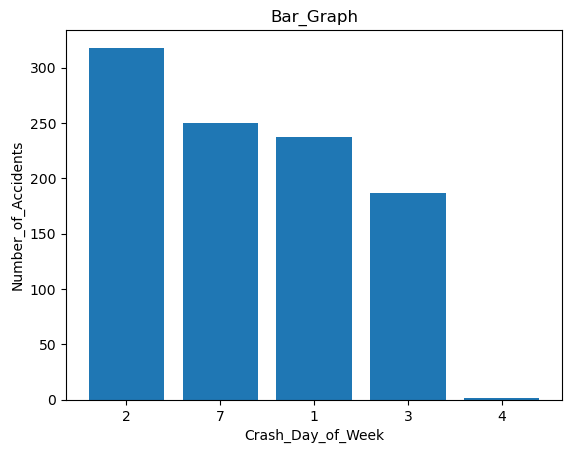

In [199]:
x1 = df['crash_day_of_week'].value_counts().index.to_list()
y1 = df['crash_day_of_week'].value_counts().to_list()

print(len(y1))
plt.bar(x1,y1)

plt.xlabel("Crash_Day_of_Week")
plt.ylabel("Number_of_Accidents")

print(y1)
plt.title('Bar_Graph')
plt.show()

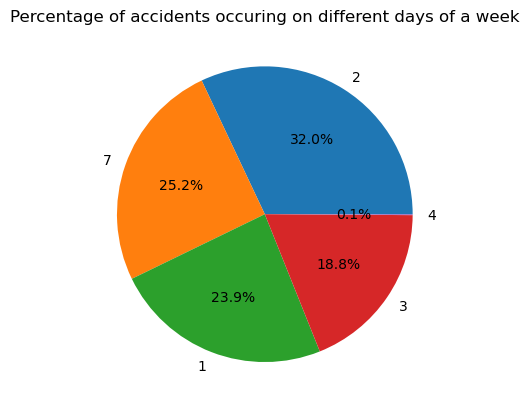

In [200]:
fig, ax = plt.subplots()
ax.pie(y1, labels=x1, autopct='%1.1f%%')
plt.title("Percentage of accidents occuring on different days of a week")
plt.show()

In [201]:
df['crash_hour'].value_counts()

16    87
17    78
15    70
14    68
18    61
12    59
8     59
13    55
19    49
11    48
10    44
9     41
7     37
21    33
20    32
22    30
23    26
3     21
2     21
1     19
0     16
6     15
5     13
4     11
Name: crash_hour, dtype: int64

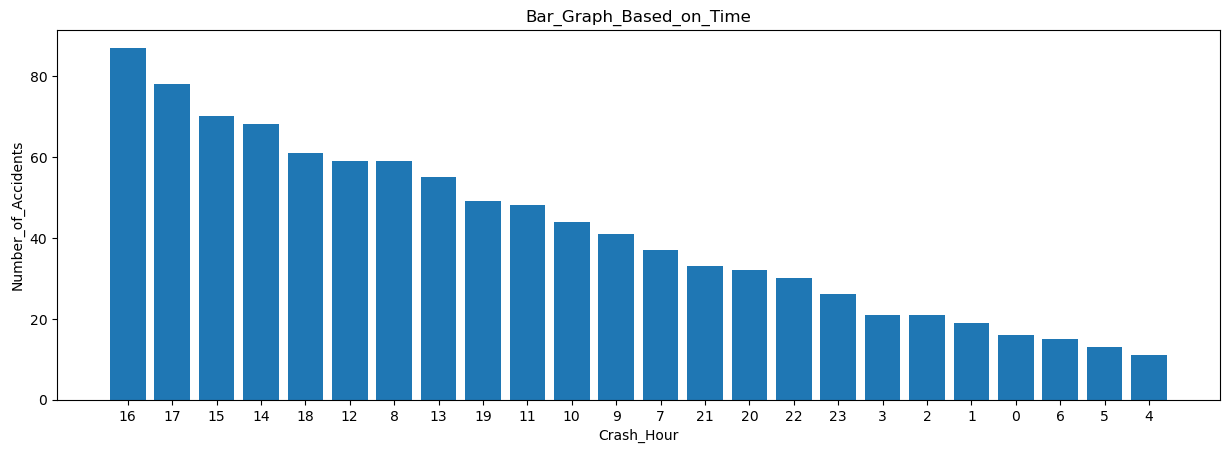

In [202]:
x2 = df['crash_hour'].value_counts().index.to_list()
y2 = df['crash_hour'].value_counts().to_list()

plt.figure().set_figwidth(15)
plt.bar(x2,y2)

plt.xlabel("Crash_Hour")
plt.ylabel("Number_of_Accidents")

plt.title('Bar_Graph_Based_on_Time')
plt.show()

In [203]:
df['weather_condition'].value_counts()

CLEAR                    639
RAIN                     274
UNKNOWN                   71
CLOUDY/OVERCAST            6
SNOW                       1
FREEZING RAIN/DRIZZLE      1
OTHER                      1
Name: weather_condition, dtype: int64

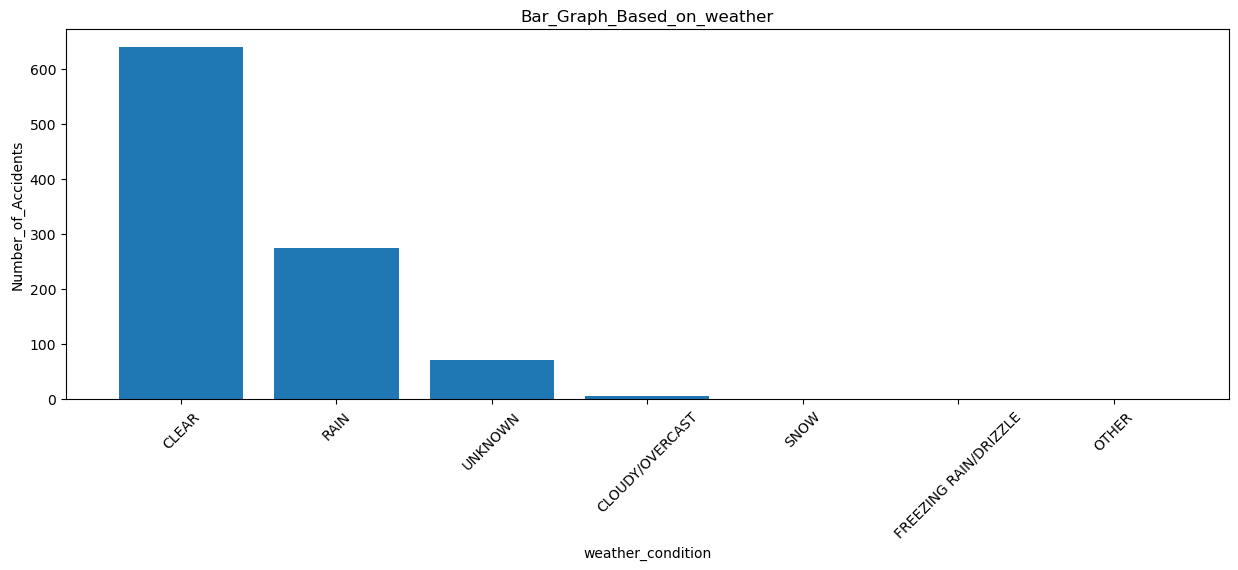

In [204]:
x3 = df['weather_condition'].value_counts().index.to_list()
y3 = df['weather_condition'].value_counts().to_list()

plt.figure().set_figwidth(15)
plt.bar(x3,y3)

plt.xlabel("weather_condition")
plt.ylabel("Number_of_Accidents")

plt.xticks(rotation=45)
plt.title('Bar_Graph_Based_on_weather')
plt.show()

### Create VeRoViz "nodes" dataframe

In [205]:
nodes = vrv.initDataframe('nodes')

In [206]:
list(nodes.columns)

['id',
 'lat',
 'lon',
 'altMeters',
 'nodeName',
 'nodeType',
 'popupText',
 'leafletIconPrefix',
 'leafletIconType',
 'leafletColor',
 'leafletIconText',
 'cesiumIconType',
 'cesiumColor',
 'cesiumIconText',
 'elevMeters']

In [207]:
list(df.columns)

['crash_record_id',
 'crash_date',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'report_type',
 'crash_type',
 'damage',
 'date_police_notified',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'street_no',
 'street_direction',
 'street_name',
 'beat_of_occurrence',
 'num_units',
 'most_severe_injury',
 'injuries_total',
 'injuries_fatal',
 'injuries_incapacitating',
 'injuries_non_incapacitating',
 'injuries_reported_not_evident',
 'injuries_no_indication',
 'injuries_unknown',
 'crash_hour',
 'crash_day_of_week',
 'crash_month',
 'latitude',
 'longitude',
 'location']

In [208]:
df[['latitude', 'longitude']].head()

,latitude,longitude
0,41.997842856,-87.68974203
1,42.012078205,-87.704283056
2,41.750714982,-87.64653012
3,41.769248417,-87.64951716
4,42.003878115,-87.679715758


In [209]:
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype('float64') # Converted the dtype to float 
                                                                                # as vrv.createleaflets is 
                                                                                #taking only float values as 
                                                                                #the input for lon and lat.


In [210]:
df[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   993 non-null    float64
 1   longitude  993 non-null    float64
dtypes: float64(2)
memory usage: 23.3 KB


In [211]:
nodes = vrv.initDataframe('nodes')
nodes['id'] = df['crash_record_id'].values
nodes[['id','lat','lon','nodeName']] = df[['crash_record_id', 'latitude', 'longitude', 'street_name']].values
nodes[['leafletIconText', 'cesiumIconText']] = df[['street_name', 'crash_record_id']].values
nodes['popupText'] = df['street_name'].values

nodes.loc[:,'altMeters'] = 0
nodes.loc[:,['nodeType', 'leafletIconPrefix', 'leafletIconType', 'leafletColor']] = [
             'AccidentSite',  'fa',                'circle-exclamation',         'orange']
nodes.loc[:,['cesiumIconType', 'cesiumColor']] = ['pin', 'Cesium.Color.ORANGE']

/var/folders/2l/396xpghd5nvb__0tg26vjb4m0000gn/T/ipykernel_47617/3679062752.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  nodes.loc[:,'altMeters'] = 0


In [212]:
nodes.head()

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters
0,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,41.997843,-87.689742,0,DEVON AVE,AccidentSite,DEVON AVE,fa,circle-exclamation,orange,DEVON AVE,pin,Cesium.Color.ORANGE,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,NaN
1,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,42.012078,-87.704283,0,TOUHY AVE,AccidentSite,TOUHY AVE,fa,circle-exclamation,orange,TOUHY AVE,pin,Cesium.Color.ORANGE,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,NaN
2,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,41.750715,-87.64653,0,79TH ST,AccidentSite,79TH ST,fa,circle-exclamation,orange,79TH ST,pin,Cesium.Color.ORANGE,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,NaN
3,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,41.769248,-87.649517,0,MORGAN ST,AccidentSite,MORGAN ST,fa,circle-exclamation,orange,MORGAN ST,pin,Cesium.Color.ORANGE,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,NaN
4,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,42.003878,-87.679716,0,RIDGE BLVD,AccidentSite,RIDGE BLVD,fa,circle-exclamation,orange,RIDGE BLVD,pin,Cesium.Color.ORANGE,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,NaN


In [213]:
vrv.createLeaflet(nodes=nodes)

In [214]:
nodes['popupText'].value_counts()

PULASKI RD          26
KEDZIE AVE          25
CICERO AVE          20
HALSTED ST          18
LAKE SHORE DR NB    17
                    ..
ROOSEVELT DR         1
LUNA AVE             1
WASHTENAW AVE        1
FERDINAND ST         1
PEORIA ST            1
Name: popupText, Length: 335, dtype: int64

In [215]:
nodes['lat'].value_counts()

41.900959    3
41.816113    2
41.883291    2
41.714126    2
41.742984    2
            ..
41.842609    1
41.920731    1
41.741057    1
41.820963    1
41.719975    1
Name: lat, Length: 980, dtype: int64

In [216]:
count = []
for i in nodes['popupText']:
    print(i, list(nodes['popupText']).count(i))
    
    count.append(list(nodes['popupText']).count(i))
    # nodes[['accidents_count']] = list(nodes['popupText']).count(i)
# print(count)
nodes['accidents_count'] = count

DEVON AVE 3
TOUHY AVE 3
79TH ST 12
MORGAN ST 3
RIDGE BLVD 1
PULASKI RD 26
HARLEM AVE 6
ELSTON AVE 5
HALSTED ST 18
OGDEN AVE 4
99TH ST 1
GLENWOOD AVE 2
KEELER AVE 2
87TH ST 4
CERMAK RD 10
DIVISION ST 5
STATE ST 7
LAWRENCE AVE 4
WENTWORTH AVE 6
CHICAGO AVE 12
BELMONT AVE 9
THORNDALE AVE 1
79TH ST 12
GRAND AVE 13
HARLEM AVE 6
STONY ISLAND AVE 9
LAKE SHORE DR 15
CLARK ST 9
WASHINGTON BLVD 6
CLARK ST 9
ADDISON ST 10
WINONA ST 2
ARCHER AVE 14
59TH ST 7
DIVISION ST 5
GREENVIEW AVE 2
ARCHER AVE 14
DORCHESTER AVE 2
RIDGE AVE 3
ARMITAGE AVE 5
MONROE ST 1
LAKE SHORE DR SB 11
WELLS ST 4
CALIFORNIA AVE 9
CENTRAL AVE 12
WALTON ST 1
JEFFERY BLVD 1
CUMBERLAND AVE 1
PERSHING RD 3
AVONDALE AVE 1
74TH ST 1
WABASH AVE 5
COTTAGE GROVE AVE 5
DR MARTIN LUTHER KING JR DR 7
ARCHER AVE 14
EXCHANGE AVE 1
126TH ST 1
15TH ST 1
LA SALLE DR 3
ILLINOIS ST 3
NARRAGANSETT AVE 4
LAKE ST 6
NARRAGANSETT AVE 4
CHESTNUT ST 1
SOUTH CHICAGO AVE 5
HARRISON ST 6
43RD ST 1
ALBANY AVE 2
ARCHER AVE 14
ASHLAND AVE 17
TALCOTT AVE 1


In [217]:
nodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters,accidents_count
0,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,41.997843,-87.689742,0,DEVON AVE,AccidentSite,DEVON AVE,fa,circle-exclamation,orange,DEVON AVE,pin,Cesium.Color.ORANGE,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,NaN,3
1,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,42.012078,-87.704283,0,TOUHY AVE,AccidentSite,TOUHY AVE,fa,circle-exclamation,orange,TOUHY AVE,pin,Cesium.Color.ORANGE,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,NaN,3
2,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,41.750715,-87.64653,0,79TH ST,AccidentSite,79TH ST,fa,circle-exclamation,orange,79TH ST,pin,Cesium.Color.ORANGE,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,NaN,12
3,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,41.769248,-87.649517,0,MORGAN ST,AccidentSite,MORGAN ST,fa,circle-exclamation,orange,MORGAN ST,pin,Cesium.Color.ORANGE,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,NaN,3
4,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,42.003878,-87.679716,0,RIDGE BLVD,AccidentSite,RIDGE BLVD,fa,circle-exclamation,orange,RIDGE BLVD,pin,Cesium.Color.ORANGE,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,41.89498,-87.6244,0,MICHIGAN AVE,AccidentSite,MICHIGAN AVE,fa,circle-exclamation,orange,MICHIGAN AVE,pin,Cesium.Color.ORANGE,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,NaN,15
989,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,41.911225,-87.626483,0,LAKE SHORE DR,AccidentSite,LAKE SHORE DR,fa,circle-exclamation,orange,LAKE SHORE DR,pin,Cesium.Color.ORANGE,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,NaN,15
990,96870d966d3c58088e559ef0276594810c5d111fb1e750...,41.768319,-87.64678,0,PEORIA ST,AccidentSite,PEORIA ST,fa,circle-exclamation,orange,PEORIA ST,pin,Cesium.Color.ORANGE,96870d966d3c58088e559ef0276594810c5d111fb1e750...,NaN,1
991,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,41.878445,-87.617055,0,LAKE SHORE DR NB,AccidentSite,LAKE SHORE DR NB,fa,circle-exclamation,orange,LAKE SHORE DR NB,pin,Cesium.Color.ORANGE,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,NaN,17


In [218]:
print(nodes['accidents_count']<10)

0       True
1       True
2      False
3       True
4       True
       ...  
988    False
989    False
990     True
991    False
992     True
Name: accidents_count, Length: 993, dtype: bool


In [223]:
nodes['is_red'] = 0
nodes['is_yellow'] = 0
nodes['is_orange'] = 0

In [224]:
nodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters,accidents_count,is_red,is_yellow,is_orange
0,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,41.997843,-87.689742,0,DEVON AVE,AccidentSite,DEVON AVE,fa,circle-exclamation,orange,DEVON AVE,pin,Cesium.Color.ORANGE,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,NaN,3,0,0,0
1,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,42.012078,-87.704283,0,TOUHY AVE,AccidentSite,TOUHY AVE,fa,circle-exclamation,orange,TOUHY AVE,pin,Cesium.Color.ORANGE,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,NaN,3,0,0,0
2,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,41.750715,-87.64653,0,79TH ST,AccidentSite,79TH ST,fa,circle-exclamation,orange,79TH ST,pin,Cesium.Color.ORANGE,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,NaN,12,0,0,0
3,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,41.769248,-87.649517,0,MORGAN ST,AccidentSite,MORGAN ST,fa,circle-exclamation,orange,MORGAN ST,pin,Cesium.Color.ORANGE,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,NaN,3,0,0,0
4,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,42.003878,-87.679716,0,RIDGE BLVD,AccidentSite,RIDGE BLVD,fa,circle-exclamation,orange,RIDGE BLVD,pin,Cesium.Color.ORANGE,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,41.89498,-87.6244,0,MICHIGAN AVE,AccidentSite,MICHIGAN AVE,fa,circle-exclamation,orange,MICHIGAN AVE,pin,Cesium.Color.ORANGE,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,NaN,15,0,0,0
989,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,41.911225,-87.626483,0,LAKE SHORE DR,AccidentSite,LAKE SHORE DR,fa,circle-exclamation,orange,LAKE SHORE DR,pin,Cesium.Color.ORANGE,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,NaN,15,0,0,0
990,96870d966d3c58088e559ef0276594810c5d111fb1e750...,41.768319,-87.64678,0,PEORIA ST,AccidentSite,PEORIA ST,fa,circle-exclamation,orange,PEORIA ST,pin,Cesium.Color.ORANGE,96870d966d3c58088e559ef0276594810c5d111fb1e750...,NaN,1,0,0,0
991,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,41.878445,-87.617055,0,LAKE SHORE DR NB,AccidentSite,LAKE SHORE DR NB,fa,circle-exclamation,orange,LAKE SHORE DR NB,pin,Cesium.Color.ORANGE,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,NaN,17,0,0,0


In [225]:
for j in range(0,len(nodes['accidents_count'])):
    if nodes['accidents_count'][j] >= 25:
        print('1', j)
        nodes['is_red'][j] = 1
        nodes['is_orange'][j] = 0
        nodes['is_yellow'][j] = 0
    if 10 <= nodes['accidents_count'][j] < 25:
        print('2', j)
        nodes['is_red'][j] = 0
        nodes['is_orange'][j] = 1
        nodes['is_yellow'][j] = 0
    if nodes['accidents_count'][j] < 10:
        print('3', j)
        nodes['is_red'][j] = 0
        nodes['is_orange'][j] = 0
        nodes['is_yellow'][j] = 1
    # elif 10 <= j < 25:
    #     nodes['is_orange'] = 1
    # elif j<10:
    #     nodes["is_yellow"] = 1
    # else:
    #     nodes['is_red'] = 0
    #     nodes['is_orange'] = 0
    #     nodes["is_yellow"] = 0
        

3 0
3 1
2 2
3 3
3 4
1 5
3 6
3 7
2 8
3 9
3 10
3 11
3 12
3 13
2 14
3 15
3 16
3 17
3 18
2 19
3 20
3 21
2 22
2 23
3 24
3 25
2 26
3 27
3 28
3 29
2 30
3 31
2 32
3 33
3 34
3 35
2 36
3 37
3 38
3 39
3 40
2 41
3 42
3 43
2 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
2 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
2 68
2 69
3 70
3 71
3 72
3 73
3 74
2 75
3 76
3 77
2 78
3 79
3 80
3 81
3 82
1 83
3 84
2 85
3 86
2 87
2 88
2 89
3 90
3 91
3 92
2 93
2 94
3 95
3 96
3 97
2 98
3 99
2 100
3 101
2 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
1 112
3 113
3 114
3 115
3 116
1 117
3 118
3 119
1 120
3 121
3 122
2 123
2 124
3 125
2 126
2 127
3 128
2 129
3 130
3 131
3 132
3 133
3 134
2 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142
3 143
3 144
3 145
3 146
2 147
3 148
1 149
2 150
2 151
3 152
3 153
2 154
2 155
3 156
3 157
3 158
2 159
3 160
3 161
3 162
3 163
3 164
3 165
3 166
1 167
3 168
3 169
3 170
3 171
3 172
3 173
3 174
3 175
3 176
3 177
3 178
3 179
3 180
3 181
3 182
3 183
3 184


/var/folders/2l/396xpghd5nvb__0tg26vjb4m0000gn/T/ipykernel_47617/797378828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['is_red'][j] = 0
/var/folders/2l/396xpghd5nvb__0tg26vjb4m0000gn/T/ipykernel_47617/797378828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['is_orange'][j] = 0
/var/folders/2l/396xpghd5nvb__0tg26vjb4m0000gn/T/ipykernel_47617/797378828.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes[

In [226]:
nodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters,accidents_count,is_red,is_yellow,is_orange
0,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,41.997843,-87.689742,0,DEVON AVE,AccidentSite,DEVON AVE,fa,circle-exclamation,orange,DEVON AVE,pin,Cesium.Color.ORANGE,c1305b5fe4a338171393588a64c4c5eeb4c11a3df83e62...,NaN,3,0,1,0
1,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,42.012078,-87.704283,0,TOUHY AVE,AccidentSite,TOUHY AVE,fa,circle-exclamation,orange,TOUHY AVE,pin,Cesium.Color.ORANGE,85dc952c5b9171332abf504db4343095205f4d9ed0b11a...,NaN,3,0,1,0
2,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,41.750715,-87.64653,0,79TH ST,AccidentSite,79TH ST,fa,circle-exclamation,orange,79TH ST,pin,Cesium.Color.ORANGE,385174cac6fc9a7a88f3e2a9db741ea50fe2361bcafa21...,NaN,12,0,0,1
3,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,41.769248,-87.649517,0,MORGAN ST,AccidentSite,MORGAN ST,fa,circle-exclamation,orange,MORGAN ST,pin,Cesium.Color.ORANGE,5e5b8a4c2b09163a0513918c7ba745006c13f1238820ef...,NaN,3,0,1,0
4,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,42.003878,-87.679716,0,RIDGE BLVD,AccidentSite,RIDGE BLVD,fa,circle-exclamation,orange,RIDGE BLVD,pin,Cesium.Color.ORANGE,179a4b2f7bb037bf04998c42e1c622b2aad0c6bd6370ce...,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,41.89498,-87.6244,0,MICHIGAN AVE,AccidentSite,MICHIGAN AVE,fa,circle-exclamation,orange,MICHIGAN AVE,pin,Cesium.Color.ORANGE,a2a83fda2d627e1756739ae50de7a7304143eeb7f32920...,NaN,15,0,0,1
989,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,41.911225,-87.626483,0,LAKE SHORE DR,AccidentSite,LAKE SHORE DR,fa,circle-exclamation,orange,LAKE SHORE DR,pin,Cesium.Color.ORANGE,77f2f413a381d2d2cffcc134ccc4ae929175f1c586308f...,NaN,15,0,0,1
990,96870d966d3c58088e559ef0276594810c5d111fb1e750...,41.768319,-87.64678,0,PEORIA ST,AccidentSite,PEORIA ST,fa,circle-exclamation,orange,PEORIA ST,pin,Cesium.Color.ORANGE,96870d966d3c58088e559ef0276594810c5d111fb1e750...,NaN,1,0,1,0
991,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,41.878445,-87.617055,0,LAKE SHORE DR NB,AccidentSite,LAKE SHORE DR NB,fa,circle-exclamation,orange,LAKE SHORE DR NB,pin,Cesium.Color.ORANGE,21fcfc796ccc074da0977335284d0dad3664eb5673725c...,NaN,17,0,0,1


In [227]:
nodes.loc[(nodes['is_red'] == 1), 
          ['leafletColor', 'cesiumColor']] = ['red', 'Cesium.Color.RED']
nodes.loc[(nodes['is_yellow'] == 1), 
          ['leafletColor', 'cesiumColor']] = ['lightgreen', 'Cesium.Color.LIGHTGREEN']
nodes.loc[(nodes['is_orange'] == 1), 
          ['leafletColor', 'cesiumColor']] = ['orange', 'Cesium.Color.ORANGE']

In [228]:
vrv.createLeaflet(nodes=nodes[nodes['leafletColor'] == 'red'])